# Expander
•I have tried to predict the Expander 'Discharge Pressure (psig)'.

•Implemented various Regression model and calulated MSE and rms

•Achieved 90% Accuray

Project done by Monika Kunwar

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline

In [2]:
#Importing Dataset
data=pd.read_csv('Desktop\Dataset\Expander_data.csv')
data.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


In [3]:
data.tail()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
296445,4/17/2020 10:31,596.611125,-230.191381,7959.768879,2997.812618,6.0,221.753096,-228.401583,NaN
296446,4/17/2020 10:31,597.319541,-230.084466,7947.662310,3004.436412,6.0,225.208842,-228.284966,NaN
296447,4/17/2020 10:31,604.480493,-230.162283,7944.993098,2999.621114,6.0,231.336761,-228.339348,NaN
296448,4/17/2020 10:32,605.071293,-229.547767,8107.651750,3008.993634,6.0,220.675692,-227.760228,NaN
296449,4/17/2020 10:32,595.669526,-230.493843,8151.621431,3006.425541,6.0,207.931428,-228.692008,NaN


In [4]:
data.columns

Index(['Timestamp', 'Suction Pressure (psig)', 'Suction Temperature (F)',
       'Total Flow (gpm)', 'Speed (rpm)', 'By-pass Valve Position (%)',
       'Discharge Pressure (psig)', 'Discharge Temperature (F)', 'Run Status'],
      dtype='object')

In [5]:
data.shape

(296450, 9)

In [6]:
data.dtypes

Timestamp                      object
Suction Pressure (psig)       float64
Suction Temperature (F)       float64
Total Flow (gpm)              float64
Speed (rpm)                   float64
By-pass Valve Position (%)    float64
Discharge Pressure (psig)     float64
Discharge Temperature (F)     float64
Run Status                    float64
dtype: object

In [7]:
data.describe()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
count,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,0.0
mean,590.541350,-231.564934,8119.917777,2955.416695,2.005667,186.991087,-229.764934,NaN
std,23.216552,3.574107,398.049531,54.201467,2.488568,56.205183,3.574136,NaN
min,552.420048,-238.594971,7056.004500,2835.750571,-0.200000,69.983885,-236.816223,NaN
25%,572.757269,-234.171427,7916.322054,2906.336126,0.000000,143.468467,-232.371760,NaN
50%,586.491792,-230.922352,8144.161813,2961.788792,0.000000,183.270451,-229.122946,NaN
75%,605.986608,-229.585168,8388.610374,3000.863611,4.000000,223.580205,-227.785796,NaN
max,649.217417,-223.440125,8975.986378,3090.367995,8.026667,324.411576,-221.617102,NaN


In [8]:
data.corr()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
Suction Pressure (psig),1.000000,0.862881,-0.873558,-0.371829,0.089420,0.905435,0.862876,NaN
Suction Temperature (F),0.862881,1.000000,-0.938631,-0.500437,0.349575,0.960071,0.999993,NaN
Total Flow (gpm),-0.873558,-0.938631,1.000000,0.484320,-0.274621,-0.973483,-0.938624,NaN
Speed (rpm),-0.371829,-0.500437,0.484320,1.000000,0.175187,-0.434955,-0.500435,NaN
By-pass Valve Position (%),0.089420,0.349575,-0.274621,0.175187,1.000000,0.400566,0.349572,NaN
Discharge Pressure (psig),0.905435,0.960071,-0.973483,-0.434955,0.400566,1.000000,0.960065,NaN
Discharge Temperature (F),0.862876,0.999993,-0.938624,-0.500435,0.349572,0.960065,1.000000,NaN
Run Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


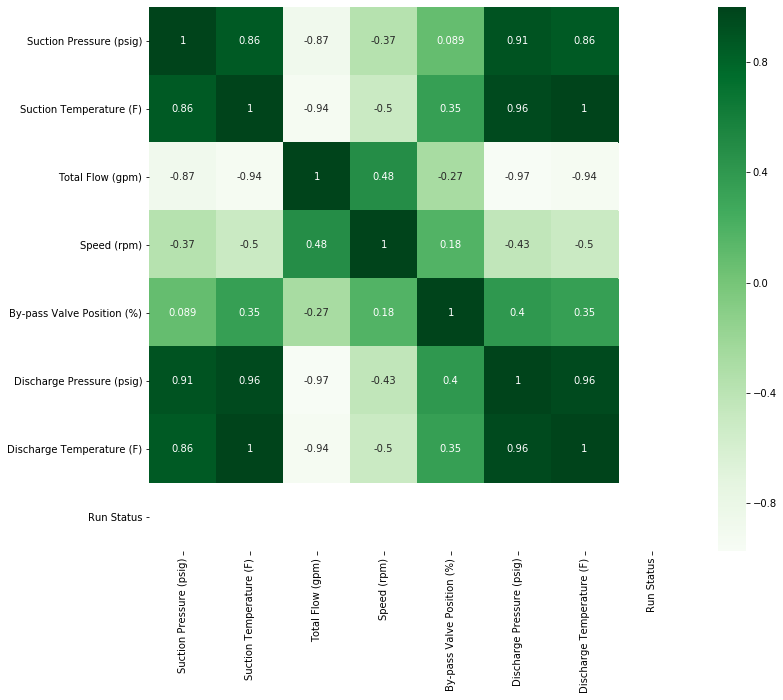

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.show()

In [10]:
data.isnull().sum()

Timestamp                          0
Suction Pressure (psig)            0
Suction Temperature (F)            0
Total Flow (gpm)                   0
Speed (rpm)                        0
By-pass Valve Position (%)         0
Discharge Pressure (psig)          0
Discharge Temperature (F)          0
Run Status                    296450
dtype: int64

In [11]:
# creating new column for date_time
data['date_time']=pd.to_datetime(data['Timestamp'])
data.head()
new_data=data.set_index('date_time')
new_data.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
date_time,,,,,,,,,
2020-01-04 21:20:00,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
2020-01-04 21:20:00,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2020-01-04 21:20:00,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
2020-01-04 21:20:00,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
2020-01-04 21:21:00,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


In [12]:
#Removing columns 
data.drop(columns=['Timestamp','Run Status','By-pass Valve Position (%)'],axis=1, inplace=True)

In [13]:
# spliting dataset into dependent & independent data

X=data.iloc[:,[0,1,2,3,5]].values
Y=data['Discharge Pressure (psig)'].values

In [14]:
#Normalization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sc=sc.fit_transform(X)

In [15]:
#Splitting Dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [16]:
#Implementing Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,Y_train)

In [17]:
#Checking the accuracy 
lr.score(X_test,Y_test)

0.9746936915776899

In [18]:
y_pred=lr.predict(X_test)
y_pred

array([159.64538329, 202.15432408, 157.68266055, ..., 154.20226853,
       122.83277717, 214.30054656])

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt 
mean_squared_error(Y_test,y_pred)

79.71296378861224

In [20]:
rms = sqrt(mean_squared_error(Y_test, y_pred))
rms

8.928211679200501

In [21]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

In [22]:
regressor.fit(X_train,Y_train)
y_pred=regressor.predict(X_test)
regressor.score(X_test,Y_test)


0.998056741287005

In [23]:
mean_squared_error(Y_test,y_pred)

6.121118451410544

In [24]:
rms = sqrt(mean_squared_error(Y_test, y_pred))
rms

2.474089418636793

In [25]:
#Implementing Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0)

C:\Users\Monika\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [26]:
regressor.fit(X_train,Y_train)
y_pred=regressor.predict(X_test)
regressor.score(X_test,Y_test)

0.9988767071619098

In [27]:
mean_squared_error(Y_test,y_pred)

3.5382877594169586

In [28]:
rms = sqrt(mean_squared_error(Y_test, y_pred))
rms

1.8810336943864028